In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
%run -i 'functions.py'

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
ERROR:root:File `'functions.py'` not found.


In [4]:
pd.set_option('display.max_columns', None)
clean= pd.read_csv('cleancolumns.csv')

In [5]:
clean

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,population,scheme_management,construction_year,extraction_type_class,management,payment,water_quality,quantity,source,waterpoint_type,status_group,operational_year
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,109,VWC,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,0,12
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,280,Other,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,0,3
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,4,Simanjiro,250,VWC,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,0,4
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,58,VWC,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,2,27
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,1,Karagwe,0,0,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Pangani,Kilimanjaro,5,Hai,125,Water Board,1999,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,0,14
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Rufiji,Iringa,4,Njombe,56,VWC,1996,gravity,vwc,pay annually,soft,enough,river,communal standpipe,0,15
59397,37057,0.0,2011-04-11,0,0,0,34.017087,-8.750434,Rufiji,Mbeya,7,Mbarali,0,VWC,0,handpump,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,0,2011
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Rufiji,Dodoma,4,Chamwino,0,VWC,0,handpump,vwc,never pay,soft,insufficient,shallow well,hand pump,0,2011


In [7]:
clean['status_group'].value_counts()

0    32259
2    22824
1     4317
Name: status_group, dtype: int64

In [10]:
nonworking = clean[clean['status_group'] == 2]

These are the water pumps that are non-fucntional. I will analyze these non fuctional water pumps to try and identify a key factor as to why these pumps are on fucntioning

In [11]:
nonworking

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,population,scheme_management,construction_year,extraction_type_class,management,payment,water_quality,quantity,source,waterpoint_type,status_group,operational_year
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,58,VWC,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,2,27
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Internal,Shinyanga,3,Shinyanga Rural,0,VWC,0,handpump,vwc,never pay,soft,enough,machine dbh,hand pump,2,2012
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Lake Tanganyika,Shinyanga,3,Kahama,0,0,0,handpump,wug,unknown,milky,enough,shallow well,hand pump,2,2012
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Lake Tanganyika,Tabora,6,Tabora Urban,0,VWC,0,handpump,vwc,never pay,salty,seasonal,machine dbh,hand pump,2,2012
16,48451,500.0,2011-07-04,Unicef,1703,DWE,34.642439,-9.106185,Rufiji,Iringa,4,Njombe,35,WUA,1978,gravity,wua,pay monthly,soft,dry,river,communal standpipe,2,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59382,47002,6.0,2013-08-03,Ces(gmbh),1383,DWE,37.454759,-3.323599,Pangani,Kilimanjaro,4,Moshi Rural,1,Water Board,2008,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,2,5
59384,72148,0.0,2011-07-10,Concern,0,CONCERN,30.667805,-2.483710,Lake Victoria,Kagera,30,Ngara,0,VWC,0,gravity,vwc,never pay,soft,insufficient,spring,communal standpipe,2,2011
59391,44885,0.0,2013-08-03,Government Of Tanzania,540,Government,38.044070,-4.272218,Pangani,Kilimanjaro,3,Same,210,Water authority,1967,gravity,vwc,never pay,soft,enough,river,communal standpipe,2,46
59392,40607,0.0,2011-04-15,Government Of Tanzania,0,Government,33.009440,-8.520888,Lake Rukwa,Mbeya,1,Chunya,0,VWC,0,gravity,vwc,never pay,soft,enough,spring,communal standpipe,2,2011


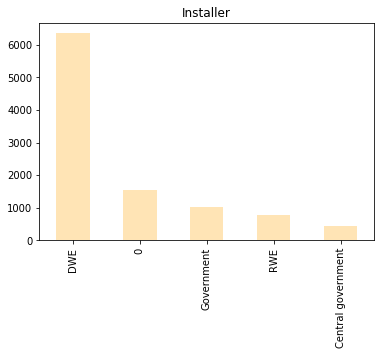

In [12]:
nonworking['installer'].value_counts().nlargest(n=5).plot(kind='bar',color='moccasin',title='Installer')

In [ ]:
0 is missing installer names

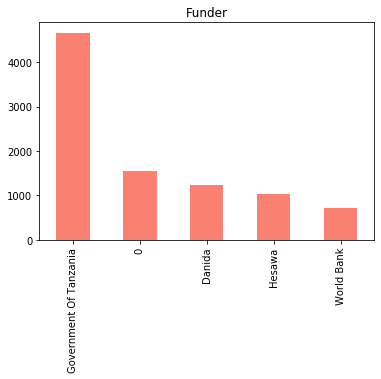

In [15]:
nonworking['funder'].value_counts().nlargest(n=5).plot(kind='bar',color='salmon',title='Funder')

Mbeya          1816
Morogoro       1587
Shinyanga      1558
Kilimanjaro    1417
Mwanza         1417
Name: region, dtype: int64


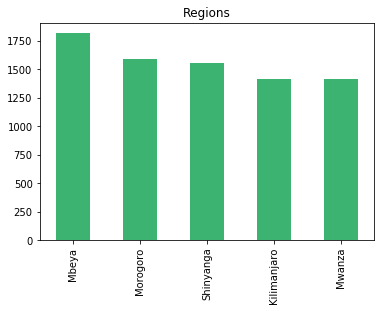

In [19]:
nonworking['region'].value_counts().nlargest(n=5).plot(kind='bar',color='mediumseagreen',title='Regions')
print(nonworking['region'].value_counts().nlargest(n=5))

In [20]:
nonworking['water_quality'].value_counts()

soft                  18154
salty                  2411
unknown                1577
milky                   352
coloured                190
salty abandoned          93
fluoride                 36
fluoride abandoned       11
Name: water_quality, dtype: int64

In [21]:
nonworking['quantity'].value_counts()

enough          9138
dry             6052
insufficient    5763
seasonal        1309
unknown          562
Name: quantity, dtype: int64

In [26]:
nonworking['waterpoint_type'].value_counts()

communal standpipe             8536
hand pump                      5654
other                          5247
communal standpipe multiple    3220
improved spring                 136
cattle trough                    30
dam                               1
Name: waterpoint_type, dtype: int64

In [27]:
nonworking['extraction_type_class'].value_counts()

gravity         8031
other           5195
handpump        5086
submersible     2597
motorpump       1714
rope pump        141
wind-powered      60
Name: extraction_type_class, dtype: int64

In [34]:
nonworking['population'].value_counts().nlargest(n=5)

0      8332
1      3760
250     815
200     704
300     618
Name: population, dtype: int64

In [25]:
nonworking.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'basin', 'region',
       'district_code', 'lga', 'population', 'scheme_management',
       'construction_year', 'extraction_type_class', 'management', 'payment',
       'water_quality', 'quantity', 'source', 'waterpoint_type',
       'status_group', 'operational_year'],
      dtype='object')

In [36]:
nonworking['longitude'].mean()

34.38100591696608

In [37]:
nonworking['latitude'].mean()

-5.810393848538787

In [84]:
nonworking[(nonworking['longitude'] > 34.38) & (nonworking['longitude'] <= 34.383)]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,population,scheme_management,construction_year,extraction_type_class,management,payment,water_quality,quantity,source,waterpoint_type,status_group,operational_year
6674,4878,0.0,2011-04-07,0,0,0,34.380894,-8.701422,Rufiji,Mbeya,7,Mbarali,0,Water Board,0,gravity,water board,never pay,coloured,seasonal,river,communal standpipe,2,2011
12807,10793,0.0,2011-04-07,0,0,0,34.380883,-8.704964,Rufiji,Mbeya,7,Mbarali,0,Water Board,0,gravity,water board,never pay,coloured,seasonal,river,communal standpipe,2,2011
22462,16547,0.0,2012-11-14,Rwssp,0,WEDECO,34.382443,-3.050534,Lake Victoria,Shinyanga,6,Meatu,0,WUG,0,other,wug,never pay,soft,enough,shallow well,other,2,2012
49841,2778,0.0,2012-10-22,Biore,0,WEDECO,34.382946,-3.802374,Internal,Shinyanga,6,Meatu,0,WUG,0,handpump,wug,never pay,soft,dry,shallow well,hand pump,2,2012


In [82]:
nonworking[(nonworking['latitude'] > -5.9) & (nonworking['latitude'] <= -5.8)]


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,population,scheme_management,construction_year,extraction_type_class,management,payment,water_quality,quantity,source,waterpoint_type,status_group,operational_year
261,15815,0.0,2013-01-19,Ministry Of Water,844,Idara ya maji,35.066309,-5.855305,Internal,Singida,3,Manyoni,250,VWC,1974,motorpump,vwc,never pay,soft,enough,machine dbh,communal standpipe multiple,2,39
361,48007,0.0,2013-03-01,Government Of Tanzania,1177,Government,37.048998,-5.844639,Wami / Ruvu,Manyara,5,Kiteto,1,VWC,2008,other,vwc,never pay,soft,seasonal,hand dtw,other,2,5
766,10976,0.0,2013-01-18,Ministry Of Water,844,Wizara ya maji,35.113764,-5.878311,Internal,Singida,3,Manyoni,450,Water authority,1975,motorpump,vwc,never pay,salty,enough,machine dbh,communal standpipe multiple,2,38
1149,2484,30.0,2011-03-09,Private Individual,66,DWE,38.665985,-5.802180,Pangani,Tanga,5,Pangani,20,Private operator,0,submersible,private operator,pay per bucket,salty,insufficient,machine dbh,communal standpipe,2,2011
1300,53864,0.0,2013-01-24,Ministry Of Water,1111,Idara ya maji,34.963928,-5.832368,Internal,Singida,3,Manyoni,250,VWC,1974,motorpump,vwc,unknown,soft,enough,machine dbh,communal standpipe multiple,2,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58262,44143,20.0,2011-03-17,Tasaf,87,DWE,38.660077,-5.805095,Pangani,Tanga,6,Pangani,250,VWC,2008,submersible,vwc,pay per bucket,salty,insufficient,machine dbh,communal standpipe,2,3
58519,64852,20.0,2011-03-17,Tasaf,80,DWE,38.661147,-5.805921,Pangani,Tanga,6,Pangani,600,VWC,2008,submersible,vwc,pay per bucket,salty,insufficient,machine dbh,communal standpipe,2,3
58960,7483,0.0,2011-03-28,Nethalan,708,DWE,37.443254,-5.837567,Wami / Ruvu,Morogoro,6,Mvomero,1,VWC,1996,other,vwc,never pay,soft,insufficient,shallow well,communal standpipe,2,15
58982,25284,0.0,2011-03-15,Lvia,0,Commu,36.468306,-5.801210,Wami / Ruvu,Dodoma,3,Kongwa,0,VWC,0,motorpump,private operator,pay per bucket,salty,dry,machine dbh,communal standpipe multiple,2,2011
